# 🚜 Predicting the Sale Price of Bulldozers using Machine Learning

In this notebook, we're going to go through an example machine learning project with the goal of predicting the sale price of bulldozers.

## 1. Problem defition

> How well can we predict the future sale price of a bulldozer, given its characteristics and previous examples of how much similar bulldozers have been sold for?

## 2. Data

The data is downloaded from the Kaggle Bluebook for Bulldozers competition: https://www.kaggle.com/c/bluebook-for-bulldozers/data

There are 3 main datasets:

* Train.csv is the training set, which contains data through the end of 2011.
* Valid.csv is the validation set, which contains data from January 1, 2012 - April 30, 2012 You make predictions on this set throughout the majority of the competition. Your score on this set is used to create the public leaderboard.
* Test.csv is the test set, which won't be released until the last week of the competition. It contains data from May 1, 2012 - November 2012. Your score on the test set determines your final rank for the competition.

## 3. Evaluation

The evaluation metric for this competition is the RMSLE (root mean squared log error) between the actual and predicted auction prices.

For more on the evaluation of this project check: https://www.kaggle.com/c/bluebook-for-bulldozers/overview/evaluation

**Note:** The goal for most regression evaluation metrics is to minimize the error. For example, our goal for this project will be to build a machine learning model which minimises RMSLE.

## 4. Features

Kaggle provides a data dictionary detailing all of the features of the dataset. You can view this data dictionary on Google Sheets: https://docs.google.com/spreadsheets/d/18ly-bLR8sbDJLITkWG7ozKm8l3RyieQ2Fpgix-beSYI/edit?usp=sharing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [2]:
# Import the training and validation sets
df = pd.read_csv("bluebook-for-bulldozers/TrainAndValid.csv",low_memory=False)
df.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000,57000,10000,38500,11000
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3,3,3,3,3
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68,4640,2838,3486,722
UsageBand,Low,Low,High,High,Medium
saledate,11/16/2006 0:00,3/26/2004 0:00,2/26/2004 0:00,5/19/2011 0:00,7/23/2009 0:00


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [4]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

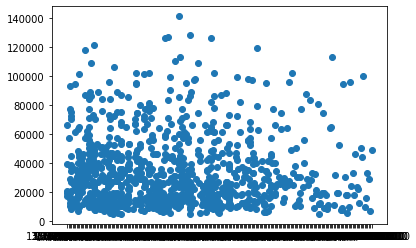

In [5]:
fig, ax=plt.subplots()
ax.scatter(df['saledate'][:1000],df['SalePrice'][:1000])

In [6]:
df.saledate[:1000]

0      11/16/2006 0:00
1       3/26/2004 0:00
2       2/26/2004 0:00
3       5/19/2011 0:00
4       7/23/2009 0:00
            ...       
995     7/16/2009 0:00
996     6/14/2007 0:00
997     9/22/2005 0:00
998     7/28/2005 0:00
999     6/16/2011 0:00
Name: saledate, Length: 1000, dtype: object

In [7]:
df.saledate.dtype

dtype('O')

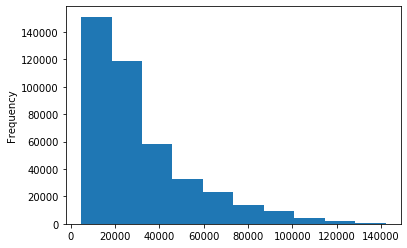

In [8]:
df.SalePrice.plot(kind="hist")

### Parsing dates

When we work with time series data, we want to enrich the time & date component as much as possible.

We can do that by telling pandas which of our columns has dates in it using the `parse_dates` parameter.

In [9]:
# Import data again but this time parse dates
df = pd.read_csv("bluebook-for-bulldozers/TrainAndValid.csv",low_memory=False,parse_dates=['saledate'])

In [10]:
df.saledate.dtype

dtype('<M8[ns]')

In [11]:
df.saledate[:1000]

0     2006-11-16
1     2004-03-26
2     2004-02-26
3     2011-05-19
4     2009-07-23
         ...    
995   2009-07-16
996   2007-06-14
997   2005-09-22
998   2005-07-28
999   2011-06-16
Name: saledate, Length: 1000, dtype: datetime64[ns]

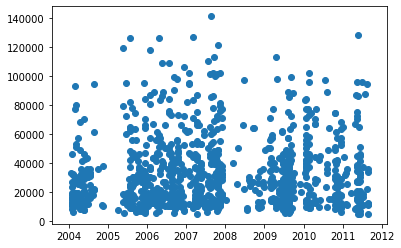

In [12]:
fig, ax=plt.subplots()
ax.scatter(df['saledate'][:1000],df['SalePrice'][:1000])

In [13]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
df.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000,57000,10000,38500,11000
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3,3,3,3,3
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68,4640,2838,3486,722
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


In [15]:
df.saledate[:20]

0    2006-11-16
1    2004-03-26
2    2004-02-26
3    2011-05-19
4    2009-07-23
5    2008-12-18
6    2004-08-26
7    2005-11-17
8    2009-08-27
9    2007-08-09
10   2008-08-21
11   2006-08-24
12   2005-10-20
13   2006-01-26
14   2006-01-03
15   2006-11-16
16   2007-06-14
17   2010-01-28
18   2006-03-09
19   2005-11-17
Name: saledate, dtype: datetime64[ns]

### Sort Dataframe by SaleDate

When we are working with time series data it is a good idea to sort it by data.

In [16]:
# sort dataframe in data order
df.sort_values(by=['saledate'],inplace=True,ascending=True)

In [17]:
df.saledate.head()

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
Name: saledate, dtype: datetime64[ns]

### Make a copy of the original DataFrame

We make a copy of the original DataFrame so that when we manipulate our data then also the original data is not lost.

In [18]:
# Make a copy 
df_temp = df.copy()

In [19]:
df_temp.saledate.head()

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
Name: saledate, dtype: datetime64[ns]

### Add date time parameters for `saledate` column

In [20]:
df_temp["saleyear"]=df_temp.saledate.dt.year
df_temp['salemonth']=df_temp.saledate.dt.month
df_temp['saleday']=df_temp.saledate.dt.day
df_temp['SaleDayOfWeek']=df_temp.saledate.dt.dayofweek
df_temp['SaleDayOfYear']=df_temp.saledate.dt.dayofyear

In [21]:
df_temp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500,14000,50000,16000,22000
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18,99,99,99,99
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00


In [22]:
# Now we have enriched our data frame so we can remove sale date
df_temp.drop('saledate',axis=1,inplace=True)

In [23]:
# Check the value of different columns
df_temp.state.value_counts()

Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Iowa               1336
Montana            1336
Oklahoma           1326
Nebraska            866
West Virginia   

In [24]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   fiModelDesc               412698 non-null  object 
 10  fiBaseModel               412698 non-null  object 
 11  fiSecondaryDesc           271971 non-null  object 
 12  fiModelSeries             58667 non-null   object 
 13  fiModelDescriptor         74816 non-nul

### Convert string to categories

One way we can turn all of our data into numbers is by converting them into pandas catgories.

We can check the different datatypes compatible with pandas here: https://pandas.pydata.org/pandas-docs/stable/reference/general_utility_functions.html#data-types-related-functionality

In [25]:
df_temp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500,14000,50000,16000,22000
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18,99,99,99,99
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
fiModelDesc,TD20,A66,D7G,A62,D3B


In [26]:
pd.api.types.is_string_dtype(df_temp["UsageBand"])

True

In [27]:
# Find the Columns which contains strings
for label, content in df_temp.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [28]:
# This will convert all the string values to the categories value
for label, content in df_temp.items():
    if pd.api.types.is_string_dtype(content):
        df_temp[label]=content.astype("category").cat.as_ordered()

In [29]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor       

In [30]:
df_temp.state.cat.categories

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'Washington DC', 'West Virginia', 'Wisconsin',
       'Wyoming'],
      dtype='object')

In [31]:
df_temp.state

205615         Texas
274835       Florida
141296       Florida
212552       Florida
62755        Florida
             ...    
410879    California
412476    California
411927    California
407124    California
409203    California
Name: state, Length: 412698, dtype: category
Categories (53, object): [Alabama < Alaska < Arizona < Arkansas ... Washington DC < West Virginia < Wisconsin < Wyoming]

In [32]:
df_temp.state.cat.codes

205615    43
274835     8
141296     8
212552     8
62755      8
          ..
410879     4
412476     4
411927     4
407124     4
409203     4
Length: 412698, dtype: int8

In [33]:
# Check missing data
df_temp.isnull().sum()/len(df_temp)

SalesID                     0.000000
SalePrice                   0.000000
MachineID                   0.000000
ModelID                     0.000000
datasource                  0.000000
auctioneerID                0.048791
YearMade                    0.000000
MachineHoursCurrentMeter    0.642586
UsageBand                   0.821492
fiModelDesc                 0.000000
fiBaseModel                 0.000000
fiSecondaryDesc             0.340993
fiModelSeries               0.857845
fiModelDescriptor           0.818715
ProductSize                 0.524851
fiProductClassDesc          0.000000
state                       0.000000
ProductGroup                0.000000
ProductGroupDesc            0.000000
Drive_System                0.740520
Enclosure                   0.000809
Forks                       0.520921
Pad_Type                    0.803498
Ride_Control                0.629928
Stick                       0.803498
Transmission                0.544444
Turbocharged                0.803498
B

### Save Preprocessed Data

In [34]:
# Export current temp DataFrame
df_temp.to_csv("bluebook-for-bulldozers/train_tmp.csv",index=False)

In [35]:
# Import Preprocessed Data
df_temp = pd.read_csv("bluebook-for-bulldozers/train_tmp.csv",low_memory=False)

In [36]:
df_temp.head().T

,0,1,2,3,4
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500,14000,50000,16000,22000
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18,99,99,99,99
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
fiModelDesc,TD20,A66,D7G,A62,D3B


In [37]:
df_temp.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension             386715
Blade_Width         

## Fill Missing Values

### Fill Numeric missing values

In [38]:
# Find the numeric values in the dataframe
for label,content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
saleyear
salemonth
saleday
SaleDayOfWeek
SaleDayOfYear


In [39]:
df_temp.ModelID

0          8434
1         10150
2          4139
3          8591
4          4089
          ...  
412693     5266
412694    19330
412695    17244
412696     3357
412697     4701
Name: ModelID, Length: 412698, dtype: int64

In [40]:
# Check which Numeric Coulmns have NUll values
for label,content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

auctioneerID
MachineHoursCurrentMeter


In [41]:
# Fill numeric rows with median
for label,content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            # Add a binary column which tells us if the data was missing
            df_temp[label+"_missing"]=pd.isnull(content)
            # Fill the missing numeric values with median
            df_temp[label]=content.fillna(content.median())

In [42]:
len(df_temp)

412698

In [43]:
# Check if there are any null values left
for label,content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

In [44]:
# Check to see what binary column did
df_temp.head().T

,0,1,2,3,4
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500,14000,50000,16000,22000
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18,99,99,99,99
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,0,0,0,0,0
UsageBand,NaN,NaN,NaN,NaN,NaN
fiModelDesc,TD20,A66,D7G,A62,D3B


In [45]:
df_temp.isna().sum()

SalesID                                  0
SalePrice                                0
MachineID                                0
ModelID                                  0
datasource                               0
auctioneerID                             0
YearMade                                 0
MachineHoursCurrentMeter                 0
UsageBand                           339028
fiModelDesc                              0
fiBaseModel                              0
fiSecondaryDesc                     140727
fiModelSeries                       354031
fiModelDescriptor                   337882
ProductSize                         216605
fiProductClassDesc                       0
state                                    0
ProductGroup                             0
ProductGroupDesc                         0
Drive_System                        305611
Enclosure                              334
Forks                               214983
Pad_Type                            331602
Ride_Contro

### FIlling and turning categorical variables into numbers
    

In [46]:
# Check for the columns which aren't numeric
for label, content in df_temp.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [47]:
# Turn categorical values into numbers and fill missing
for label,content in df_temp.items():
    if not pd.api.types.is_numeric_dtype(content):
        # Add a binary column to indicate that wether the sample has missing data
        df_temp[label+"_missing"]=pd.isnull(content)
        # Turn categories into numbers and add +1
        df_temp[label]=pd.Categorical(content).codes +1

In [48]:
pd.Categorical(df_temp['state']).codes

array([43,  8,  8, ...,  4,  4,  4], dtype=int8)

In [49]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Columns: 103 entries, SalesID to Steering_Controls_missing
dtypes: bool(46), float64(3), int16(4), int64(10), int8(40)
memory usage: 77.9 MB


In [50]:
df_temp.head().T

,0,1,2,3,4
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500,14000,50000,16000,22000
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
...,...,...,...,...,...
Backhoe_Mounting_missing,False,True,False,True,False
Blade_Type_missing,False,True,False,True,False
Travel_Controls_missing,False,True,False,True,False
Differential_Type_missing,True,False,True,False,True


In [51]:
df_temp.isna().sum()

SalesID                      0
SalePrice                    0
MachineID                    0
ModelID                      0
datasource                   0
                            ..
Backhoe_Mounting_missing     0
Blade_Type_missing           0
Travel_Controls_missing      0
Differential_Type_missing    0
Steering_Controls_missing    0
Length: 103, dtype: int64

In [52]:
len(df_temp)

412698

In [53]:
%%time
# Instantiate model 
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_jobs=-1)
np.random.seed(42)
# Fit the model 
model.fit(df_temp.drop("SalePrice",axis=1),df_temp['SalePrice'])

Wall time: 4min 53s


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

### Splitting Data into Train/Validation sets

In [54]:
df_temp.saleyear

0         1989
1         1989
2         1989
3         1989
4         1989
          ... 
412693    2012
412694    2012
412695    2012
412696    2012
412697    2012
Name: saleyear, Length: 412698, dtype: int64

In [55]:
df_temp.saleyear.value_counts()

2009    43849
2008    39767
2011    35197
2010    33390
2007    32208
2006    21685
2005    20463
2004    19879
2001    17594
2000    17415
2002    17246
2003    15254
1998    13046
1999    12793
2012    11573
1997     9785
1996     8829
1995     8530
1994     7929
1993     6303
1992     5519
1991     5109
1989     4806
1990     4529
Name: saleyear, dtype: int64

In [56]:
# Split data into training and validation
df_val = df_temp[df_temp.saleyear==2012]
df_train = df_temp[df_temp.saleyear != 2012]

len(df_val), len(df_train)

(11573, 401125)

In [57]:
## Split the data into x and y
x_train, y_train = df_train.drop("SalePrice",axis=1), df_train['SalePrice']
x_valid, y_valid = df_val.drop("SalePrice",axis=1), df_val['SalePrice']

x_train.shape, y_train.shape, x_valid.shape, y_valid.shape

((401125, 102), (401125,), (11573, 102), (11573,))

In [58]:
y_train

0          9500.0
1         14000.0
2         50000.0
3         16000.0
4         22000.0
           ...   
401120    29000.0
401121    11000.0
401122    11000.0
401123    18000.0
401124    13500.0
Name: SalePrice, Length: 401125, dtype: float64

### Build an evaluation function

In [59]:
# Create evaluation function ( the competition uses  RMSLE)
from sklearn.metrics import mean_squared_log_error, mean_absolute_error,r2_score

def rmsle(y_test,y_preds):
    """
    Calculates root mean squared log error between predictions and true lables.
    """
    return np.sqrt(mean_squared_log_error(y_test,y_preds))

# Create function to evaluate model on a few different levels
def  show_scores(model):
    train_preds = model.predict(x_train)
    val_preds = model.predict(x_valid)
    scores= {'Training MAE':mean_absolute_error(y_train,train_preds),
             'Valid MAE':mean_absolute_error(y_valid,val_preds),
             'Training RMSLE':rmsle(y_train,train_preds),
             'Valid RMSLE': rmsle(y_valid,val_preds),
             'Training R^2':r2_score(y_train,train_preds),
             'Valid R^2':r2_score(y_valid,val_preds)}
    return scores

 ### Testing our model on a subset(to tune the hyperparameters)

In [60]:
# Change max_samples Value
model = RandomForestRegressor(n_jobs=-1,random_state=42,max_samples=10000)

In [61]:
%%time 
# Cutting down on the max number of samples
model.fit(x_train,y_train)

Wall time: 9.2 s


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=10000, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [62]:
show_scores(model)

{'Training MAE': 5561.2988092240585,
 'Valid MAE': 7177.26365505919,
 'Training RMSLE': 0.257745378256977,
 'Valid RMSLE': 0.29362638671089003,
 'Training R^2': 0.8606658995199189,
 'Valid R^2': 0.8320374995090507}

### Hyperparameter tunning with RandomizedSearchCV

In [63]:
%%time
from sklearn.model_selection import RandomizedSearchCV

# Different RandomForestRegressor Hyperparameters
rf_grid = {'n_estimators':np.arange(10,100,10),
           'max_depth':[None,3,5,10],
           'min_samples_split':np.arange(2,20,2),
           'min_samples_leaf':np.arange(1,20,2),
           'max_features':[0.5,1,'auto','sqrt'],
           'max_samples':[10000]}

# Instantiate RandomizedSearchCV
rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,random_state=42),
                              param_distributions=rf_grid,
                              n_iter=5,
                              cv=5,
                              verbose=True)

rs_model.fit(x_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:  1.7min finished


Wall time: 1min 49s


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100, n_jobs=-1,
                   

In [64]:
# Find the best model hyperparameters
rs_model.best_params_

{'n_estimators': 90,
 'min_samples_split': 18,
 'min_samples_leaf': 3,
 'max_samples': 10000,
 'max_features': 0.5,
 'max_depth': None}

In [65]:
show_scores(rs_model)

{'Training MAE': 6116.268985145623,
 'Valid MAE': 7407.41382920978,
 'Training RMSLE': 0.2778297361264891,
 'Valid RMSLE': 0.30079218361701754,
 'Training R^2': 0.8339023980470647,
 'Valid R^2': 0.8220344426622025}

### Train the model with best hyperparameters
**NOTE** we found this after 100 iterations for `RandomizedSearchCV`

In [66]:
%%time 
ideal_model = RandomForestRegressor(n_estimators=100,min_samples_leaf=1,min_samples_split=14,max_features=0.5,n_jobs=-1,max_samples=None)

#Fit the ideal model
ideal_model.fit(x_train,y_train)

Wall time: 2min 17s


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=0.5, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=14, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [67]:
show_scores(ideal_model)

{'Training MAE': 2923.3384399294946,
 'Valid MAE': 5912.267282867678,
 'Training RMSLE': 0.14326822443096857,
 'Valid RMSLE': 0.2445095366573781,
 'Training R^2': 0.9597897501430454,
 'Valid R^2': 0.8829081326923105}

In [68]:
show_scores(rs_model)

{'Training MAE': 6116.268985145623,
 'Valid MAE': 7407.41382920978,
 'Training RMSLE': 0.2778297361264891,
 'Valid RMSLE': 0.30079218361701754,
 'Training R^2': 0.8339023980470646,
 'Valid R^2': 0.8220344426622025}

## Make predictions on the test data

In [94]:
# Import the data
df_test = pd.read_csv("bluebook-for-bulldozers/Test.csv",low_memory=False,parse_dates=['saledate'])
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


In [95]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12457 entries, 0 to 12456
Data columns (total 52 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   SalesID                   12457 non-null  int64         
 1   MachineID                 12457 non-null  int64         
 2   ModelID                   12457 non-null  int64         
 3   datasource                12457 non-null  int64         
 4   auctioneerID              12457 non-null  int64         
 5   YearMade                  12457 non-null  int64         
 6   MachineHoursCurrentMeter  2129 non-null   float64       
 7   UsageBand                 1834 non-null   object        
 8   saledate                  12457 non-null  datetime64[ns]
 9   fiModelDesc               12457 non-null  object        
 10  fiBaseModel               12457 non-null  object        
 11  fiSecondaryDesc           8482 non-null   object        
 12  fiModelSeries     

In [96]:
df_test.isna().sum()

SalesID                         0
MachineID                       0
ModelID                         0
datasource                      0
auctioneerID                    0
YearMade                        0
MachineHoursCurrentMeter    10328
UsageBand                   10623
saledate                        0
fiModelDesc                     0
fiBaseModel                     0
fiSecondaryDesc              3975
fiModelSeries               10451
fiModelDescriptor            9433
ProductSize                  6409
fiProductClassDesc              0
state                           0
ProductGroup                    0
ProductGroupDesc                0
Drive_System                 9698
Enclosure                       2
Forks                        6149
Pad_Type                    10349
Ride_Control                 8216
Stick                       10349
Transmission                 7639
Turbocharged                10349
Blade_Extension             11806
Blade_Width                 11806
Enclosure_Type

### Preprocessing the data
* Getting the test data set in the same format as our training dataset

In [97]:
def preprocess_data(df):
    """
    Performs transformations on df and returns transformed df.
    """
    df["saleyear"] = df.saledate.dt.year
    df["salemonth"] = df.saledate.dt.month
    df["saleday"] = df.saledate.dt.day
    df["SaleDayOfWeek"] = df.saledate.dt.dayofweek
    df["SaleDayOfYear"] = df.saledate.dt.dayofyear
    
    df.drop("saledate", axis=1, inplace=True)
    
    # Fill the numeric rows with median
    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                # Add a binary column which tells us if the data was missing or not
                df[label+"_missing"] = pd.isnull(content)
                # Fill missing numeric values with median
                df[label] = content.fillna(content.median())
    
        # Filled categorical missing data and turn categories into numbers
        if not pd.api.types.is_numeric_dtype(content):
            df[label+"_missing"] = pd.isnull(content)
            # We add +1 to the category code because pandas encodes missing categories as -1
            df[label] = pd.Categorical(content).codes+1
    
    return df

In [98]:
# Process the data
df_test = preprocess_data(df_test)
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_missing,Stick_Length_missing,Thumb_missing,Pattern_Changer_missing,Grouser_Type_missing,Backhoe_Mounting_missing,Blade_Type_missing,Travel_Controls_missing,Differential_Type_missing,Steering_Controls_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,True,False,False,False,True,True


In [99]:
x_train.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_missing,Stick_Length_missing,Thumb_missing,Pattern_Changer_missing,Grouser_Type_missing,Backhoe_Mounting_missing,Blade_Type_missing,Travel_Controls_missing,Differential_Type_missing,Steering_Controls_missing
0,1646770,1126363,8434,132,18.0,1974,0.0,0,4593,1744,...,True,True,True,True,True,False,False,False,True,True
1,1821514,1194089,10150,132,99.0,1980,0.0,0,1820,559,...,True,True,True,True,True,True,True,True,False,False
2,1505138,1473654,4139,132,99.0,1978,0.0,0,2348,713,...,True,True,True,True,True,False,False,False,True,True
3,1671174,1327630,8591,132,99.0,1980,0.0,0,1819,558,...,True,True,True,True,True,True,True,True,False,False
4,1329056,1336053,4089,132,99.0,1984,0.0,0,2119,683,...,True,True,True,True,True,False,False,False,True,True


In [100]:
# We can find which column is missing
set(x_train.columns)-set(df_test.columns)

{'auctioneerID_missing'}

In [101]:
# Manually set the auctioners id
df_test['auctioneerID_missing'] = False

In [102]:
set(x_train.columns)-set(df_test.columns)

set()

In [103]:
# Make predictions on the data
test_preds = ideal_model.predict(df_test)

In [104]:
test_preds

array([19659.83852101, 20109.27970088, 49399.7080163 , ...,
       14675.85287008, 19655.51667223, 28386.68538389])

In [107]:
df_preds = pd.DataFrame()
df_preds['SalesID']=df_test['SalesID']
df_preds['SalesPrice']=test_preds
df_preds

,SalesID,SalesPrice
0,1227829,19659.838521
1,1227844,20109.279701
2,1227847,49399.708016
3,1227848,64310.494348
4,1227863,44450.678502
...,...,...
12452,6643171,45097.719406
12453,6643173,15142.196992
12454,6643184,14675.852870
12455,6643186,19655.516672


In [108]:
### Feature Importance
# Find feature importance of our best model
ideal_model.feature_importances_

array([3.40841122e-02, 1.91191350e-02, 4.14375377e-02, 1.93918311e-03,
       3.33150353e-03, 2.03086446e-01, 3.08674929e-03, 1.05214311e-03,
       4.13276138e-02, 4.52487142e-02, 6.73580439e-02, 4.92036250e-03,
       1.66208410e-02, 1.57640175e-01, 4.47619038e-02, 6.01211954e-03,
       1.55634163e-03, 2.47338653e-03, 3.57534191e-03, 6.71884483e-02,
       5.22219694e-04, 2.09288161e-04, 8.71400731e-04, 1.85624360e-04,
       1.23442607e-03, 7.23409852e-05, 1.85606162e-03, 6.05641428e-03,
       3.14275030e-03, 1.86473927e-04, 5.16189855e-03, 1.94605258e-03,
       4.41115309e-03, 2.69992676e-03, 2.29124564e-03, 8.94791466e-03,
       8.78096134e-04, 1.17600891e-02, 2.16915976e-03, 1.75973457e-03,
       1.17259624e-03, 1.14070769e-03, 1.39336475e-03, 5.74688975e-04,
       4.39457546e-04, 3.59323791e-04, 5.12178441e-04, 2.15768415e-03,
       1.13846567e-03, 5.72358257e-04, 5.00206991e-04, 7.34951016e-02,
       3.80305804e-03, 5.65689271e-03, 2.90797951e-03, 9.92829911e-03,
      

In [113]:
feature_importance = pd.DataFrame(x_train.columns,ideal_model.feature_importances_)
feature_importance

,0
0.034084,SalesID
0.019119,MachineID
0.041438,ModelID
0.001939,datasource
0.003332,auctioneerID
...,...
0.000441,Backhoe_Mounting_missing
0.000122,Blade_Type_missing
0.000172,Travel_Controls_missing
0.000090,Differential_Type_missing


In [124]:
# Function for plotting Feature Importance
def plot_features(columns,importance,n=20):
    df =(pd.DataFrame({'features':columns,
                       'feature_importance':importance})
         .sort_values('feature_importance',ascending=False)
         .reset_index(drop=True))
    
    # Plot the dataframe
    fig, ax = plt.subplots()
    ax.barh(df['features'][:n],df['feature_importance'][:n])
    ax.set_ylabel('Features')
    ax.set_xlabel('Feature Importance')
    ax.invert_yaxis()

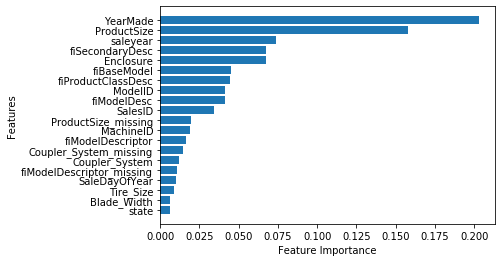

In [125]:
plot_features(x_train.columns,ideal_model.feature_importances_)